In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Show the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


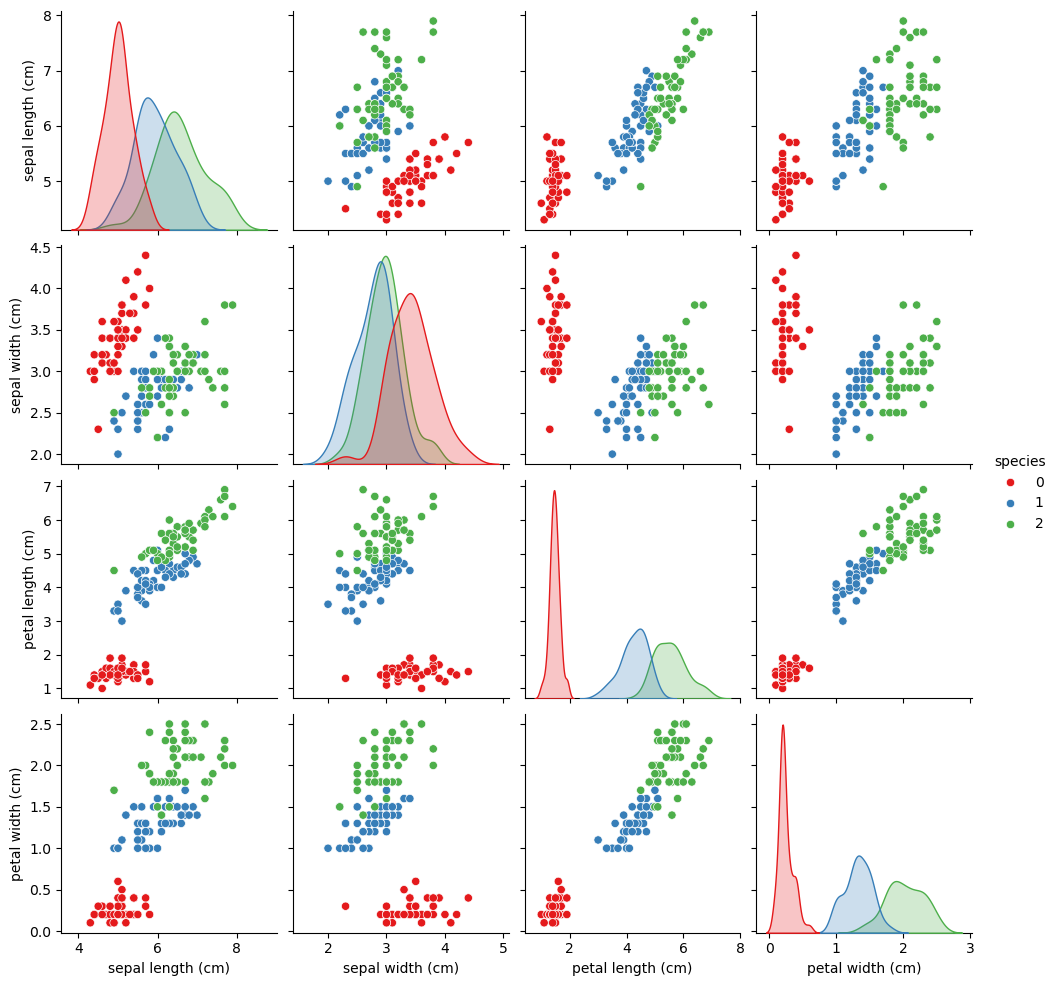

In [2]:
# Visualize the relationships between different features with pairplot
sns.pairplot(df, hue='species', palette='Set1')
plt.show()

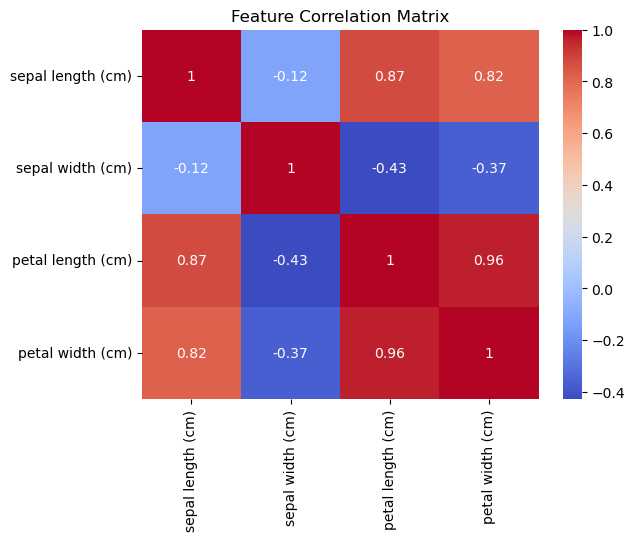

In [3]:
# Correlation matrix
corr_matrix = df.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

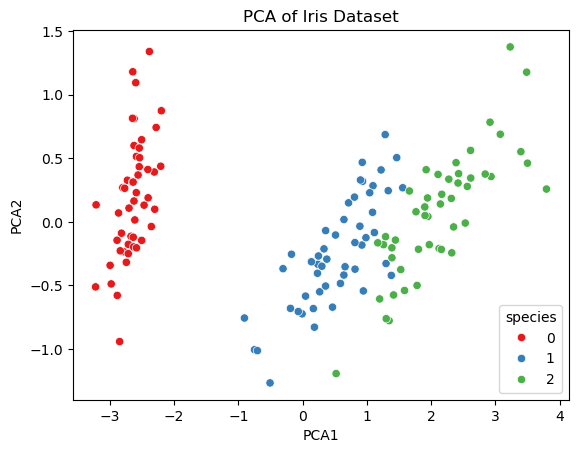

In [4]:
# Apply PCA to reduce the dataset to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, :-1])

# Plot the 2D PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['species'] = df['species']

sns.scatterplot(x='PCA1', y='PCA2', hue='species', palette='Set1', data=pca_df)
plt.title("PCA of Iris Dataset")
plt.show()

In [9]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


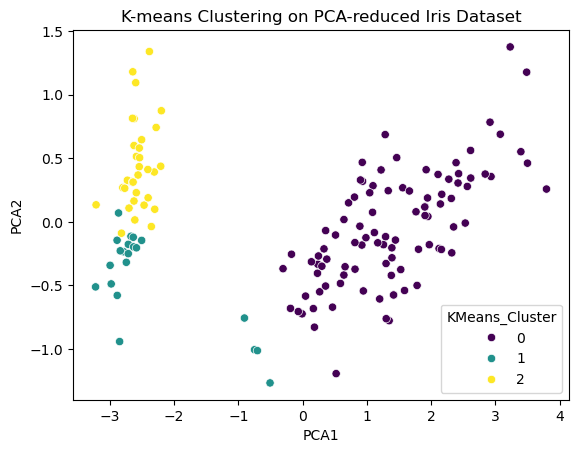

In [10]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Add the K-means labels to the data frame
df['KMeans_Cluster'] = kmeans_labels

# Visualize the K-means clustering result with PCA
sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("K-means Clustering on PCA-reduced Iris Dataset")
plt.show()


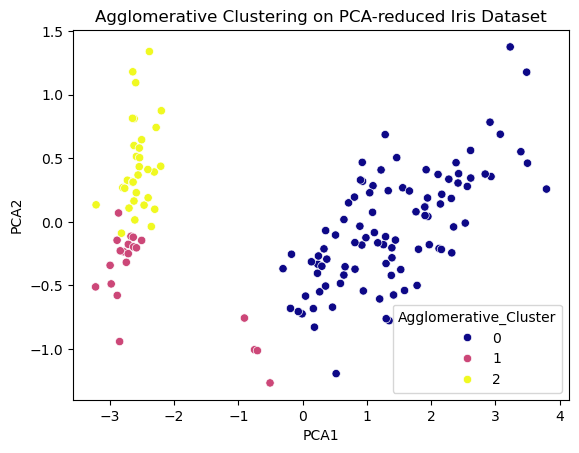

In [11]:
# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(scaled_features)

# Add the Agglomerative labels to the data frame
df['Agglomerative_Cluster'] = agglomerative_labels

# Visualize the Agglomerative clustering result with PCA
sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue=df['Agglomerative_Cluster'], palette='plasma')
plt.title("Agglomerative Clustering on PCA-reduced Iris Dataset")
plt.show()


In [12]:
# Calculate silhouette scores for both methods
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
agglo_silhouette = silhouette_score(scaled_features, agglomerative_labels)

print(f"Silhouette Score for K-means: {kmeans_silhouette:.3f}")
print(f"Silhouette Score for Agglomerative Clustering: {agglo_silhouette:.3f}")


Silhouette Score for K-means: 0.575
Silhouette Score for Agglomerative Clustering: 0.575
